<a href="https://colab.research.google.com/github/ManoahABENZOAR/Spark/blob/main/sparkEXO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#00 - Configuration of Apache Spark on Collaboratory


###Installing Java, Spark, and Findspark


---


This code installs Apache Spark 3.0.1, Java 8, and [Findspark](https://github.com/minrk/findspark), a library that makes it easy for Python to find Spark.

In [ ]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget  http://apache.osuosl.org/spark/spark-3.2.3/spark-3.2.3-bin-hadoop2.7.tgz   
!tar xf spark-3.2.3-bin-hadoop2.7.tgz  
!rm spark-3.2.3-bin-hadoop2.7.tgz    
!pip install -q findspark

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
--2023-01-02 18:25:35--  http://apache.osuosl.org/

In [ ]:
#!wget https://repos.spark-packages.org/graphframes/graphframes/0.8.1-spark3.0-s_2.12/graphframes-0.8.1-spark3.0-s_2.12.jar
!wget https://repos.spark-packages.org/graphframes/graphframes/0.8.2-spark3.2-s_2.12/graphframes-0.8.2-spark3.2-s_2.12.jar

--2023-01-02 18:26:01--  https://repos.spark-packages.org/graphframes/graphframes/0.8.2-spark3.2-s_2.12/graphframes-0.8.2-spark3.2-s_2.12.jar
Resolving repos.spark-packages.org (repos.spark-packages.org)... 13.35.24.68, 13.35.24.100, 13.35.24.22, ...
Connecting to repos.spark-packages.org (repos.spark-packages.org)|13.35.24.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247880 (242K) [binary/octet-stream]
Saving to: ‘graphframes-0.8.2-spark3.2-s_2.12.jar’

graphframes-0.8.2-s 100%[===================>] 242.07K  --.-KB/s    in 0.01s   

2023-01-02 18:26:01 (21.0 MB/s) - ‘graphframes-0.8.2-spark3.2-s_2.12.jar’ saved [247880/247880]



### Set Environment Variables
Set the locations where Spark and Java are installed.

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark/"
os.environ["DRIVE_DATA"] = "/content/gdrive/My Drive/SparkNotebook22-23-main/data/"

!rm /content/spark
!ln -s /content/spark-3.2.3-bin-hadoop2.7 /content/spark

#!mv graphframes-0.8.1-spark3.0-s_2.12.jar /content/spark/jars/
!mv graphframes-0.8.2-spark3.2-s_2.12.jar /content/spark/jars/

!export SPARK_HOME=/content/spark
!export PATH=$PATH:$SPARK_HOME/bin:$SPARK_HOME/sbin

!echo $SPARK_HOME
!env |grep  "DRIVE_DATA"

!ls -l /content/

/content/spark/
DRIVE_DATA=/content/gdrive/My Drive/SparkNotebook22-23-main/data/
total 12
drwx------  6 root root 4096 Jan  2 18:21 gdrive
drwxr-xr-x  1 root root 4096 Dec 20 20:19 sample_data
lrwxrwxrwx  1 root root   34 Jan  2 18:26 spark -> /content/spark-3.2.3-bin-hadoop2.7
drwxr-xr-x 13  501 1000 4096 Nov 14 18:28 spark-3.2.3-bin-hadoop2.7


### Start a SparkSession
This will start a local Spark session.

In [ ]:
!python -V

import findspark
findspark.init()

from pyspark import SparkContext
sc = SparkContext.getOrCreate()

sc.addPyFile('/content/spark/jars/graphframes-0.8.2-spark3.2-s_2.12.jar')

# Example: shows the PySpark version
print("PySpark version {0}".format(sc.version))

# Example: parallelise an array and show the 2 first elements
sc.parallelize([2, 3, 4, 5, 6]).cache().take(2)

Python 3.8.16
PySpark version 3.2.3


[2, 3]

In [ ]:
from pyspark.sql import SparkSession
# We create a SparkSession object (or we retrieve it if it is already created)
spark = SparkSession \
.builder \
.appName("My application") \
.config("packages","graphframes:graphframes-0.8.2-spark3.2-s_2.12") \
.master("local[4]") \
.getOrCreate()
# We get the SparkContext
sc = spark.sparkContext

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).




---


# 03 - Working :

## Exercise 3.1: Word count

Count the number of words *per line* in the $DRIVE_DATA/quijote.txt file. 

Repeat the exercise but this time counting the number of words *in the whole file*.

In [ ]:
from zmq.constants import NULL
from pyspark.sql import functions as F
from pyspark.sql.functions import col
# so that we can use the F.split() function.

dfQuijote = spark.read.text(os.environ["DRIVE_DATA"] + "/quijote.txt")
dfQuijote.show(truncate=False)
dfQuijote.schema
print(dfQuijote['value'])

newdf = dfQuijote.withColumn('value', \
       F.when(col('value')=="" ,None) \
          .otherwise(F.col("value"))) \
          .na.drop() \
          .withColumn('value', F.split(col('value'), ' ')) \
          .withColumn('size', F.size(col("value"))) \
          #.withColumn("size",col("size").cast('int')) \

newdf.show(truncate=False)
sum = newdf.select(F.sum('size')).collect()
print(sum)

+---------------------------------------------------------------------------+
|value                                                                      |
+---------------------------------------------------------------------------+
|The Project Gutenberg EBook of Don Quijote, by Miguel de Cervantes Saavedra|
|                                                                           |
|This eBook is for the use of anyone anywhere at no cost and with           |
|almost no restrictions whatsoever.  You may copy it, give it away or       |
|re-use it under the terms of the Project Gutenberg License included        |
|with this eBook or online at www.gutenberg.net                             |
|                                                                           |
|                                                                           |
|Title: Don Quijote                                                         |
|                                                               

## Exercise 4.1: Pi Estimation

Using the Monte Carlo method, estimate the value of Pi. Use the random() method from the random class.

In [ ]:
import random
import numpy as np
#from random import random
def inCircle():
    #randomly chose a point between 0 and 1, named X
    a = random.random() 
    b = random.random()
    x = -1 + 2 * a # absisse 
    y = -1 + 2 * b # ordonnée 
    
    d = x**2 + y**2  # square of the distance OX
    if d <= 1: # if point X in the circle 
        return 1
    else:     # else
        return 0

N = 0 # init the number of point in the circle --> will increase 
f = 10000000
for n in range(f):
    N += inCircle()
print("PI ~= {}".format(4 * N / f))

PI ~= 3.14097


## Exercise 4.2: Inspect a log file

Upload the file /var/log/syslog from your computer to this notebook. Then, select only the "bad lines": WARNING and ERROR messages.

In [ ]:
df = spark.read.text(os.environ["DRIVE_DATA"] + "/syslog")
df.createOrReplaceTempView("dff")

dfF = spark.sql("SELECT value FROM dff \
                         WHERE  lower(value) like '%warning%' \
                         OR  upper(value) like '%warning%' \
                         OR  lower(value) like '%error%' \
                         OR  upper(value) like '%error%' ")

dfF.select("value").show(truncate=False)
dfF.count()

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|value                                                                                                                                                                                                                                                               |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Nov 22 17:20:17 student-laptop snapd[1206]: stateengine.go:149: state ensure error: Get https://api.snapcraft.io/api/v1/snaps/sections: dial tcp: lookup api.snapcraft.io: no such host                           

136

### Exercise 5.1: Word count

**Using RDDs**, count the number of lines in the `$DRIVE_DATA/quijote.txt` file. Then, count the number of words in the file. Finally, count the number of *different* words in the file.


In [ ]:
quijoteRDD = sc.textFile(os.environ["DRIVE_DATA"] + "quijote.txt", use_unicode=True)

print( "Nombre de lignes {0}".format(quijoteRDD.count()) ) # nombre de lignes
#print(quijoteRDD.collect())
quirdd = quijoteRDD.filter(lambda x: len(x) != 0) # enlève les lignes vides = ''
qrdd = quirdd.map(lambda x: ( len( x.split(" ")) ))
words = quirdd.flatMap(lambda x: x.split(" ") )
print( "Nombre de lignes non vides {0}".format(qrdd.count()) ) #nombre de lignes non vides
#print(qrdd.collect())
print( "Nombre de mots {0} (compte les espaces comme des mots)".format(qrdd.sum()) ) #nombre de mots
#print(words.take(10))
print( "Nombre de mots distinct {0}".format(words.distinct().count()-1) ) # -1 pour enlever le mot = " "


Nombre de lignes 37861
Nombre de lignes non vides 31931
Nombre de mots 387834 (compte les espaces comme des mots)
Nombre de mots distinct 40059


### Exercise 5.2: Count people by age

Using RDDs, create a barplot showing of number of people (y-axis) per age (x-axis) using the information in the $DRIVE_DATA/people.txt file



(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 2.]),
 array([17.  , 17.72, 18.44, 19.16, 19.88, 20.6 , 21.32, 22.04, 22.76,
        23.48, 24.2 , 24.92, 25.64, 26.36, 27.08, 27.8 , 28.52, 29.24,
        29.96, 30.68, 31.4 , 32.12, 32.84, 33.56, 34.28, 35.  , 35.72,
        36.44, 37.16, 37.88, 38.6 , 39.32, 40.04, 40.76, 41.48, 42.2 ,
        42.92, 43.64, 44.36, 45.08, 45.8 , 46.52, 47.24, 47.96, 48.68,
        49.4 , 50.12, 50.84, 51.56, 52.28, 53.  ]),
 <a list of 50 Patch objects>)

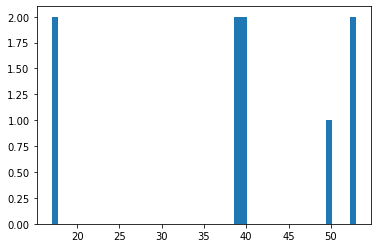

In [ ]:
#prdd = sc.textFile(os.environ["DRIVE_DATA"] + "people.txt")
linesrdd = sc.textFile(os.environ["DRIVE_DATA"] + "/people.txt", use_unicode=True)
prdd = linesrdd.map(lambda x: (x.split("\t")[0], int(x.split("\t")[1])))        #int
  #prdd = linesrdd.map(lambda x: (x.split("\t")[0], x.split("\t")[1]))            #string
#print(prdd.count())
#print(prdd.sortBy(lambda x: x[1]).collect())
dfNew = spark.createDataFrame(prdd, ['Nom', 'Age'])
#dfNew.show()




import matplotlib.pyplot as plt
# Show histogram of the 'Age' column
bins, counts = dfNew.select('Age').rdd.flatMap(lambda x: x).histogram(50)
plt.hist(bins[:-1], bins=bins, weights=counts)


### Exercise 5.3: Obtain the number of received citations 

Using RDDs, write a PySpark program that obtains, from the cite75_99.txt file, the number of citations received by each patent. 


In [ ]:
!ls "$DRIVE_DATA"
#lrdd = sc.textFile(os.environ["DRIVE_DATA"] + "cite75_99.txt", use_unicode=True)
lrdd = sc.textFile(os.environ["DRIVE_DATA"] + "ct.txt", use_unicode=True) # took just a small part of the file because the whole text is to big
lrdd = lrdd.map(lambda x: (x.split(",")[0], x.split(",")[1])) 
lrdd = lrdd.map(lambda x: (x[1], 1))
print("\nSorting the valuse from the smallest to the biggest : ")
print(lrdd.reduceByKey(lambda x,y:x+y).sortBy(lambda x: x[1]).collect())




12-2.csv	       cite75_99.txt.tar.bz2   part-apat63.txt
12-4_MaxAvgDiff.csv    country_codes.txt       people.txt
12-5_diff.csv	       ct.txt		       quijote.txt
2015-summary.csv       dfSE2.parquet	       sw.json
apat63_99.txt	       dfSE.json	       sw.txt
apat63_99.txt.tar.bz2  dfSE.parquet	       syslog
books		       dfSE-partition.parquet  testjson.txt
by-day		       italianPosts.csv.bz2
cite75_99.txt	       myscript.py

Sorting the valuse from the smallest to the biggest : 
[('"CITED"', 1), ('1324234', 1), ('3398406', 1), ('3557384', 1), ('2949611', 1), ('3146465', 1), ('3574238', 1), ('3681785', 1), ('17445', 1), ('956203', 1), ('3634889', 1), ('1515701', 1), ('3319261', 1), ('3668705', 1), ('3707004', 1), ('3156927', 1), ('3221341', 1), ('3684611', 1), ('14040', 1), ('2211676', 3)]


## Exercise 11.1:

A long time ago in a galaxy far, far away, the characters of the Star Wars franchise interacted with each other in an endless series of films. An ancient Jedi order, called the *Data Guardians of the Galaxy* (not affiliated to Marvel's homonym :) registered all those interactions and saved them on a digital file so that they could be studied by the forthcoming generations. This file was originally called (guess it) `sw.txt`, and you will find it in the `/data` directory. 

Using pySpark, perform the following operations and answer the following questions:

1. Load the `$DRIVE_DATA/sw.txt` file. Take into account that it is a JSON file.
2. Using this information, create a graph of interactions between the Star Wars characters.
3. How many different characters are there?
4. How many interactions are there?
5. Who is the central character in Star Wars (the one who interacts in most scenes)? 
6. Who is the character with the highest 'rank' in Star Wars (use the PageRank algorithm)?

 
 Nombre de persos diff 111
 
 Nombre d interactions [Row(sum(inDegree)=444)]
 
 Perso le plus impt
+---+-------+-----+-----+
| id| colour| name|value|
+---+-------+-----+-----+
| 18|#DDA0DD|PADME|   75|
+---+-------+-----+-----+

 
 Perso avec le plus haut rank
+---+-------+----+-----+
| id| colour|name|value|
+---+-------+----+-----+
| 34|#9ACD32|YODA|   46|
+---+-------+----+-----+



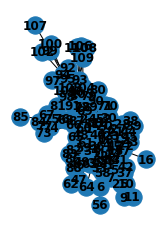

In [ ]:
#DF

sw1 = spark.read.option("multiline","true").json(os.environ["DRIVE_DATA"] + "/sw.txt")
#sw1.printSchema()
#sw1.show()
  # pour afficher 1 seule colonne
  #links = sw1.select(col('links')).show()
  #pour afficher sous colonne
  #sw1.select("nodes.name").show()


from zmq.constants import NULL
from pyspark.sql import functions as F
# so that we can use the F.split() function.

from pyspark.sql.types import *

sw2 = sw1.withColumn("links_nodes", F.explode(F.arrays_zip("links", "nodes")))\
    .select("links_nodes.links", "links_nodes.nodes")
#sw2.show()

sw2l = sw2.drop("nodes")
sw2n = sw2.drop("links")
  #sw2l.show()

  #sw2l.select('links.source').show()
sw2l = sw2l.select("links","links.source","links.target","links.value")
  #sw2l.show()
sw2n = sw2n.select("nodes","nodes.colour","nodes.name","nodes.value")
  #sw2n.show()

from pyspark.sql.functions import monotonically_increasing_id as auto
sw2n = sw2n.withColumn("id", auto())
  #sw2n.show()

vsw2l = sw2l.drop("links")
vsw2n = sw2n.drop("nodes")
vsw2n = sw2n.select("id","colour","name","value")
  #renaming
vsw2l = vsw2l.withColumnRenamed('source', 'src')
vsw2l = vsw2l.withColumnRenamed('target', 'dst')
#vsw2l.show()
#vsw2n.show()
  #print(vsw2l.tail(5))

  #from graphframes import *
  #already import
import matplotlib.pyplot as plt
import networkx as nx
def PlotGraph(edge_list):
    Gplot=nx.Graph()
    for row in edge_list.select('src','dst').take(1000):
        Gplot.add_edge(row['src'],row['dst'])

    plt.subplot(121)
    nx.draw(Gplot, with_labels=True, font_weight='bold')


g = GraphFrame(vsw2n, vsw2l)
PlotGraph(g.edges)

#Get in-degree of each vertex
  #g.inDegrees.show()

#How many different characters are there?
rows1 = vsw2n.select("name").rdd.distinct()
  #print(rows1.collect())
print( " \n Nombre de persos diff {0}".format(rows1.distinct().count()-1) )


#How many interactions are there?
sum = g.inDegrees.select(F.sum('inDegree')).collect()
print(" \n Nombre d interactions {0}".format(sum))

#Who is the central character in Star Wars (the one who interacts in most scenes)?
  #print(g.inDegrees.select("inDegree").rdd.max())
print(" \n Perso le plus impt")
g.inDegrees.inDegree
df = g.inDegrees.filter(  g.inDegrees.inDegree >= 23  )
df = vsw2n.filter(  vsw2n.id == 18  )
df.show()

from pyspark.sql.functions import desc
#Who is the character with the highest 'rank' in Star Wars (use the PageRank algorithm)?
print(" \n Perso avec le plus haut rank")
results = g.pageRank(resetProbability=0.01, maxIter=20)
  #results.vertices.select("id", "pagerank").show()
  #results.vertices.select("id", "pagerank").orderBy(desc('pagerank')).show()
df = vsw2n.filter(  vsw2n.id == 34  )
df.show()

## Exercise 12.1

Let us extract information from the cite75_99.txt and apat63_99.txt files. Write a script that performs the following operations:

1. From the cite75_99.txt file, obtain the number of citations received by each patent. You must produce a DataFrame with the following format:

| PatentNum | ncitations |
|-----------|------------|
| 3060453   |    3       |
| 3390168   |    6       |
| 3626542   |   18       | 
| 3611507   |    5       |
| 3000113   |    4       |


2. From the apat63_99.txt file, create a DataFrame to show the patent number, its country and the patent year, discarding the rest of fields in the file. The DataFrame produced must have the following format:

|PatentNum |country|Year |
|----------|-------|-----|
| 3070801  | BE    | 1963| 
| 3070802  | US    | 1963| 
| 3070803  | US    | 1963| 
| 3070804  | US    | 1963| 
| 3070805  | US    | 1963|

 
**Requirements**

 - Both DataFrames must be stored in Parquet format with gzip compression. Check the number of partitions of each DataFrame and the number of files gererated.

 - It is **strongly advised** to copy the files from your Drive to a temporal directory in the notebook virtual machine and unzip them there. This will reduce the execution times. See the cell below:
        

In [ ]:
!mkdir /tmp/data/
!cp "$DRIVE_DATA"apat63_99.txt.tar.bz2 "$DRIVE_DATA"cite75_99.txt.tar.bz2 /tmp/data
%cd /tmp/data
!ls
!tar -jxf apat63_99.txt.tar.bz2
!tar -jxf cite75_99.txt.tar.bz2
!rm /tmp/data/*.tar.bz2
!ls


/tmp/data
apat63_99.txt.tar.bz2  cite75_99.txt.tar.bz2
apat63_99.txt  cite75_99.txt


In [ ]:
#Cite 

from pyspark.sql import functions as F
df = spark.read.text("/tmp/data/"+"cite75_99.txt") 
df = df.withColumn('PatentNum', F.split(F.col('value'), ',').getItem(0)) \
        .withColumn('ncitations', F.split(F.col('value'), ',').getItem(1)) \
        .select('PatentNum', 'ncitations')  
df = df.where(df.PatentNum != '"CITING"')
df = df.groupBy("ncitations").count() \
                             .withColumnRenamed('ncitations', 'PatentNum') \
                             .withColumnRenamed('count', 'ncitations')
df.show() 
df.write.parquet("/tmp/data/ct.parquet")                     



########################
#apat
df2 = spark.read.text("/tmp/data/"+"apat63_99.txt") 
df2.printSchema()
#df2.show()

df2 = df2.withColumn('value', \
       F.when(F.col('value')=="" ,None) \
          .otherwise(F.col("value"))) \
          .na.drop() \
          .withColumn('PatentNum', F.split(F.col('value'), ',').getItem(0)) \
          .withColumn('Country', F.split(F.col('value'), ',').getItem(4)) \
          .withColumn('Year', F.split(F.col('value'), ',').getItem(1)) 
#df2.show()
df2 = df2.where(df2.PatentNum != '"PATENT"')        
df2 = df2.select("PatentNum","Country","Year")  


df2.show()    
df2.write.parquet("/tmp/data/apat.parquet")

#delete the parquet to be able to re run the same code
import shutil
"""
shutil.rmtree('/tmp/data/ct.parquet')
shutil.rmtree('/tmp/data/apat.parquet')
"""

+---------+----------+
|PatentNum|ncitations|
+---------+----------+
|  2866982|         2|
|  3720533|        18|
|  2599580|         1|
|  1454857|         1|
|  3584362|         8|
|  3555754|         3|
|  3065579|         3|
|  3559449|         3|
|  3557600|         8|
|  3712181|         9|
|  3677920|        53|
|   205069|         7|
|  3757818|         6|
|  2793900|         2|
|  2387335|         2|
|  2196511|         3|
|  3023876|         7|
|  1980776|         3|
|  3094258|        11|
|  3541977|         6|
+---------+----------+
only showing top 20 rows

root
 |-- value: string (nullable = true)

+---------+-------+----+
|PatentNum|Country|Year|
+---------+-------+----+
|  3070801|   "BE"|1963|
|  3070802|   "US"|1963|
|  3070803|   "US"|1963|
|  3070804|   "US"|1963|
|  3070805|   "US"|1963|
|  3070806|   "US"|1963|
|  3070807|   "US"|1963|
|  3070808|   "US"|1963|
|  3070809|   "US"|1963|
|  3070810|   "US"|1963|
|  3070811|   "US"|1963|
|  3070812|   "US"|1963|
|  3

"\nshutil.rmtree('/tmp/data/ct.parquet')\nshutil.rmtree('/tmp/data/apat.parquet')\n"

## Exercise 12.2

Write a code that, from the Parquet files created in the previous exercise, obtains for each country and for each year: the total number of patents, the total number of citations from those patents, the average number of citations and the maximum number of citations. Compute only those values in which there are any values in both files (*inner join*). In addition, each country must show its whole name, obtained from the *country_codes.txt* file. The final DataFrame must look like this one:


|Country            |Year|PatentsNum |TotalCitations|AvgCitations      |MaxCitations|
|-------------------|----|-----------|--------------|------------------|------------|
|Algeria            |1963|2          |7             |3.5               |4           |
|Algeria            |1968|1          |2             |2.0               |2           |
|Algeria            |1970|1          |2             |2.0               |2           |
|Algeria            |1972|1          |1             |1.0               |1           |
|Algeria            |1977|1          |2             |2.0               |2           |
|Andorra            |1987|1          |3             |3.0               |3           |
|Andorra            |1993|1          |1             |1.0               |1           |
|Andorra            |1998|1          |1             |1.0               |1           |
|Antigua and Barbuda|1978|1          |6             |6.0               |6           |
|Antigua and Barbuda|1979|1          |14            |14.0              |14          |
|Antigua and Barbuda|1991|1          |8             |8.0               |8           |
|Antigua and Barbuda|1994|1          |19            |19.0              |19          |
|Antigua and Barbuda|1995|2          |12            |6.0               |11          |
|Antigua and Barbuda|1996|2          |3             |1.5               |2           |
|Argentina          |1963|14         |35            |2.5               |7           |
|Argentina          |1964|20         |60            |3.0               |8           |
|Argentina          |1965|10         |35            |3.5               |10          |
|Argentina          |1966|16         |44            |2.75              |9           |
|Argentina          |1967|13         |60            |4.615384615384615 |14          |

**Requirements**

- The output DataFrame must be saved in a single CSV file, with a header and without any compression.


In [ ]:
from pyspark.sql import functions as F
# load datasets from the parquet
df =spark.read.parquet("/tmp/data/ct.parquet")
df2 =spark.read.parquet("/tmp/data/apat.parquet")
df2 = df2.withColumn('Country', F.split(F.col('Country'), '"').getItem(1))
dft= spark.read.text(os.environ["DRIVE_DATA"] + "/country_codes.txt")

# Split the column  "Dz\tAlgeria" in 2 columns :  Dz | Algeria
dft = dft.withColumn('value', \
       F.when(F.col('value')=="" ,None) \
          .otherwise(F.col("value"))) \
          .na.drop() \
          .withColumn('code', F.split(F.col('value'), '\t').getItem(0)) \
          .withColumn('Country22', F.split(F.col('value'), '\t').getItem(1))
dft = dft.select("code","country22") 

#join code et pays
join = df2.join(dft, df2.Country == dft.code)
join = join.select("PatentNum","country22","Year").withColumnRenamed('country22', 'Country')

#join Patentnum et ncitations
df = df.withColumnRenamed('PatentNum', 'C')
join = join.join(df, join.PatentNum == df.C).select("Country","Year","PatentNum","ncitations")

################ Diff datasets ####################################################################
################ Small dataset --> 1 min to run 
minjoin = join.where(join.Country<"Argentina") 
#save it as a .CSV file
#minjoin.write.option("header",True).csv(os.environ["DRIVE_DATA"] + "/12-2_smallversion.csv") 
################ Whole dataset --> 2 mins to run
jj = join

from pyspark.sql.functions import col
from pyspark. sql . functions import avg
# compute sum
jj1 =  jj.groupBy("Country","Year").sum( "ncitations").withColumnRenamed('sum(ncitations)', 'TotalCitations') \
                                                     .withColumnRenamed('Country', 'c1') \
                                                     .withColumnRenamed('Year', 'y1')                                                 
# compute avg
jj2 =  jj.groupBy("Country","Year").avg( "ncitations").withColumnRenamed('avg(ncitations)', 'AvgCitations') \
                                                     .withColumnRenamed('Country', 'c2') \
                                                     .withColumnRenamed('Year', 'y2') 
# compute max
jj3 =  jj.groupBy("Country","Year").max( "ncitations").withColumnRenamed('max(ncitations)', 'MaxCitations') \
                                                     .withColumnRenamed('Country', 'c3') \
                                                     .withColumnRenamed('Year', 'y3') 
#compute patentnum
jj4 =  jj.groupBy("Country","Year").count().withColumnRenamed('count', 'PatentsNum')

#Join the 4 datasets 1 jj4
jj4 = jj4.join(jj1, (jj4.Country == jj1.c1) & (jj4.Year == jj1.y1) ).select("Country","Year","PatentsNum","TotalCitations")
jj4 = jj4.join(jj2, (jj4.Country == jj2.c2) & (jj4.Year == jj2.y2) ).select("Country","Year","PatentsNum","TotalCitations","AvgCitations")
jj4 = jj4.join(jj3, (jj4.Country == jj3.c3) & (jj4.Year == jj3.y3) ).select("Country","Year","PatentsNum","TotalCitations","AvgCitations","MaxCitations")
jj4 = jj4.sort(col("Country"),col("Year"))
jj4.show()
#save it as a .CSV file
jj4.write.option("header",True).csv(os.environ["DRIVE_DATA"] + "/12-2.csv") 

+-------------------+----+----------+--------------+-----------------+------------+
|            Country|Year|PatentsNum|TotalCitations|     AvgCitations|MaxCitations|
+-------------------+----+----------+--------------+-----------------+------------+
|            Algeria|1963|         2|             7|              3.5|           4|
|            Algeria|1968|         1|             2|              2.0|           2|
|            Algeria|1970|         1|             2|              2.0|           2|
|            Algeria|1972|         1|             1|              1.0|           1|
|            Algeria|1977|         1|             2|              2.0|           2|
|            Andorra|1987|         1|             3|              3.0|           3|
|            Andorra|1993|         1|             1|              1.0|           1|
|            Andorra|1998|         1|             1|              1.0|           1|
|Antigua and Barbuda|1978|         1|             6|              6.0|      

AnalysisException: ignored

## Exercise 12.3

From the apat63_99.txt file, obtain the number of patents per country and year **using RDDs** (do not use DataFrames). The resulting RDD must be a key/value RDD in which the key is a country and the value a list of tuples. Each tuple will be composed of a year and the number of patents of the country during that year. In addition, the resulting RDD must be sorted by  the country code and, for each country, values must be sorted by year.

Example of output key/value entry:

    (u'PA', [(u'1963', 2), (u'1964', 2), (u'1965', 1), (u'1966', 1), (u'1970', 1), (u'1971', 1), (u'1972', 6), (u'1974', 3), (u'1975', 5), (u'1976', 3), (u'1977', 2), (u'1978', 2), (u'1980', 2), (u'1982', 1), (u'1983', 1), (u'1985', 2), (u'1986', 1), (u'1987', 2), (u'1988', 1), (u'1990', 1), (u'1991', 2), (u'1993', 1), (u'1995', 1), (u'1996', 1), (u'1999', 1)])

**Requirements:**

- You must remove the double quotation marks from the country code.
- Use 8 partitions to read the apat63_99.txt.bz2 file.


In [ ]:
#--NotebookApp.iopub_data_rate_limit=1.0e10
  # to solve the pb I use a smaller file

#rdd = sc.textFile(os.environ["DRIVE_DATA"] + "apat63_99.txt.tar.bz2").repartition(8)
rdd = sc.textFile(os.environ["DRIVE_DATA"] + "part-apat63.txt").repartition(8)
  #print(rdd.getNumPartitions())

# take the good columns
rdd = rdd.map(lambda x: [x.split(",")[i] for i in [0,1,4]] ) 

#remove the first line 
rdd = rdd.filter(lambda x: x != ['"PATENT"', '"GYEAR"', '"COUNTRY"'])

#remove double quotation marks from country code and reorganise the rdd
rdd = rdd.map(   lambda x: (  x[2].split('"')[1]+"\t"+x[1], [ x[0], x[1] ] )   )
rdd = rdd.map(   lambda x: (x[0], 1)   ).reduceByKey(   lambda x, y: x+y  )
rdd = rdd.map(lambda x: ( x[0].split("\t")[0] , [  x[0].split("\t")[1], x[1]  ] ) )

#fuse the rdd to obtain the final form
def Combiner(a):    #Turns value a (a tuple) into a list of a single tuple.
    return [a]

def MergeValue(a, b): #a is the new type [(,), (,), ..., (,)] and b is the old type (,)
    a.extend([b])
    return a

def MergeCombiners(a, b): #a is the new type [(,),...,(,)] and so is b, combine them
    a.extend(b)
    return a

rdd = rdd.combineByKey(Combiner, MergeValue, MergeCombiners)
print(rdd.collect())

[('CN', [['1968', 1], ['1980', 1], ['1963', 1]]), ('NO', [['1968', 1], ['1980', 1], ['1963', 1]]), ('CH', [['1963', 12], ['1968', 12], ['1980', 12]]), ('FR', [['1980', 11], ['1968', 11], ['1963', 11]]), ('NZ', [['1968', 1], ['1963', 1], ['1980', 1]]), ('DZ', [['1980', 1], ['1968', 1], ['1963', 1]]), ('PT', [['1980', 1], ['1968', 1], ['1963', 1]]), ('DE', [['1963', 27], ['1980', 27], ['1968', 27]]), ('NL', [['1968', 2], ['1980', 2], ['1963', 2]]), ('US', [['1996', 1], ['1980', 476], ['1968', 476], ['1963', 477]]), ('JP', [['1963', 4], ['1968', 4], ['1980', 4]]), ('IT', [['1980', 2], ['1968', 2], ['1963', 2]]), ('GB', [['1980', 21], ['1968', 21], ['1963', 21]]), ('DK', [['1963', 1], ['1968', 1], ['1980', 1]]), ('ES', [['1968', 1], ['1963', 1], ['1980', 1]]), ('BE', [['1980', 2], ['1963', 2], ['1968', 2]]), ('CA', [['1980', 8], ['1968', 8], ['1963', 8]]), ('AT', [['1968', 3], ['1980', 3], ['1963', 3]]), ('SE', [['1980', 7], ['1968', 7], ['1963', 7]])]


## Exercise 12.4

From the Parquet files created in Exercise 12.1, create a DataFrame that gives the patent or patents with the higher number of citations per country and year, as well as the average of the number of citations per country and year, and the difference between the maximum and the average values. The resulting DataFrame should look like this:


|Country|Year|PatentNum|max  |average       |diff              |
|-------|----|---------|-----|--------------|------------------|
|AD     |1987|4688621  |3    |3.0           |0.0               |
|AD     |1993|5193231  |1    |1.0           |0.0               |
|AD     |1998|5765303  |1    |1.0           |0.0               |
|AE     |1984|4482959  |5    |5.0           |0.0               |
|AE     |1985|4554981  |14   |14.0          |0.0               |
|AE     |1987|4663181  |3    |3.0           |0.0               |
|AE     |1989|4805221  |7    |5.0           |2.0               |
|AE     |1990|4909321  |2    |2.0           |0.0               |
|AE     |1991|5004552  |3    |2.0           |1.0               |
|AE     |1992|5104556  |4    |4.0           |0.0               |
|AE     |1993|5181569  |8    |8.0           |0.0               |
|AE     |1996|5580125  |1    |1.0           |0.0               |
|AG     |1978|4126850  |6    |6.0           |0.0               |
|AG     |1979|4172981  |14   |14.0          |0.0               |
|AG     |1991|5013035  |8    |8.0           |0.0               |
|AG     |1994|5345071  |19   |19.0          |0.0               |
|AG     |1995|5457307  |11   |6.0           |5.0               |
|AG     |1996|5525786  |2    |1.5           |0.5               |

**Requirements:**

- The DataFrame must be sorted by country code and year.
- Do **NOT** replace the country code by its whole name.
- The output must be saved as a single CSV file, with a header and without any compression.


In [ ]:
df =spark.read.parquet("/tmp/data/ct.parquet")
df2 =spark.read.parquet("/tmp/data/apat.parquet")
from pyspark.sql.functions import col

#df.show()
df2 = df2 = df2.withColumn('Country', F.split(F.col('Country'), '"').getItem(1)).withColumnRenamed("PatentNum", "P2")
#df2.show()
join = df.join(df2, (df.PatentNum == df2.P2)  ).select("Country","Year","PatentNum","ncitations")
#join.show()

# Compute max |	average |	diff in --> j1 | j2 | j3

# compute  max (sometimes several max)
j1 =  join.groupBy("Country","Year").max( "ncitations") \
                                    .withColumnRenamed("max(ncitations)", "mc1") \
                                    .withColumnRenamed("Country", "c1") \
                                    .withColumnRenamed("Year", "y1")
j1 = join.join(j1, (join.Country == j1.c1) & (join.Year == j1.y1) ).select("Country","Year","PatentNum","ncitations","mc1")                                 
j1 = j1.where(j1.ncitations == j1.mc1)  
#j1.show()

# compute  avg
from pyspark. sql . functions import avg
j2 =  join.groupBy("Country","Year").avg( "ncitations") \
                                    .withColumnRenamed("avg(ncitations)", "avg") \
                                    .withColumnRenamed("Country", "c2") \
                                    .withColumnRenamed("Year", "y2")
j2 = j1.join(j2, (j1.Country == j2.c2) & (j1.Year == j2.y2) ).select("Country","Year","PatentNum","ncitations","mc1","avg").sort(col("Country"),col("Year"))                                 
#j2.show()

#compute diff 
j2 = j2.select("Country","Year","PatentNum","mc1","avg") \
                  .withColumn('diff', col('mc1')-col('avg')) \
                  .withColumnRenamed("mc1", "max") \
                  .withColumnRenamed("avg", "average")

j2.show()
#save it as a .CSV file
j2.write.option("header",True).csv(os.environ["DRIVE_DATA"] + "/12-4_MaxAvgDiff.csv")

+-------+----+---------+---+-------+----+
|Country|Year|PatentNum|max|average|diff|
+-------+----+---------+---+-------+----+
|     AD|1987|  4688621|  3|    3.0| 0.0|
|     AD|1993|  5193231|  1|    1.0| 0.0|
|     AD|1998|  5765303|  1|    1.0| 0.0|
|     AE|1984|  4482959|  5|    5.0| 0.0|
|     AE|1985|  4554981| 14|   14.0| 0.0|
|     AE|1987|  4663181|  3|    3.0| 0.0|
|     AE|1989|  4805221|  7|    5.0| 2.0|
|     AE|1990|  4909321|  2|    2.0| 0.0|
|     AE|1991|  5004552|  3|    2.0| 1.0|
|     AE|1992|  5104556|  4|    4.0| 0.0|
|     AE|1993|  5181569|  8|    8.0| 0.0|
|     AE|1996|  5580125|  1|    1.0| 0.0|
|     AG|1978|  4126850|  6|    6.0| 0.0|
|     AG|1979|  4172981| 14|   14.0| 0.0|
|     AG|1991|  5013035|  8|    8.0| 0.0|
|     AG|1994|  5345071| 19|   19.0| 0.0|
|     AG|1995|  5457307| 11|    6.0| 5.0|
|     AG|1996|  5525786|  2|    1.5| 0.5|
|     AM|1995|  5382341|  2|    2.0| 0.0|
|     AN|1979|  4165701|  1|    1.0| 0.0|
+-------+----+---------+---+------

AnalysisException: ignored

## Exercise 12.5

From the Parquet file with the (PatentNum,Country,Year) information from Exercise 12.1, create a DataFrame that shows the number of patents associated to each country per decade (understanding as a *decade* the years from 0 to 9; e.g. from 1970 to 1979). In addition, the DataFrame must show the increase or decrease of the number of patents per country and decade with respect to the previous decade. The resulting DataFrame must look like this:

|Country|Decade|PatentsNum|Diff|
|-------|------|----------|----|
|AD     |1980  |1         |0   |
|AD     |1990  |5         |4   |
|AE     |1980  |7         |0   |
|AE     |1990  |11        |4   |
|AG     |1970  |2         |0   |
|AG     |1990  |7         |5   |
|AI     |1990  |1         |0   |
|AL     |1990  |1         |0   |
|AM     |1990  |2         |0   |
|AN     |1970  |1         |0   |
|AN     |1980  |2         |1   |
|AN     |1990  |5         |3   |
|AR     |1960  |135       |0   |
|AR     |1970  |239       |104 |
|AR     |1980  |184       |-55 |
|AR     |1990  |292       |108 |

**Requirements**

- The DataFrame must be sorted by country code and year.
- Do **NOT** replace the country code by its whole name.
- The output must be saved as a single CSV file, with a header and without any compression.

In [ ]:
from pyspark.sql.types import StringType,BooleanType,DateType,ArrayType
import pyspark.sql.functions as f

df =spark.read.parquet("/tmp/data/apat.parquet")
df = df.withColumn('Country', F.split(F.col('Country'), '"').getItem(1)) \
                                        .select("Country", "Year", "PatentNum") \
                                        .withColumn('Decade', F.split(F.col('Year'), '').getItem(2)*10 \
                                          + F.split(F.col('Year'), '').getItem(1) * 100 \
                                          +F.split(F.col('Year'), '').getItem(0)*1000    ) 
# OR df = df .withColumn(  'Decade2', df.Year - F.split(F.col('Year'), '').getItem(3)  ) 
df = df.withColumn(   'Decade', df.Decade.cast('integer')   ).select("Country", "Decade", "PatentNum")
df = df.groupBy("Country","Decade").count().withColumnRenamed('count', 'PatentNum').sort(col("Country"),col("Decade"))

# increase or decrease ?
from pyspark.sql.window import Window
df = df.withColumn(   "res", F.split(F.col('Country'), '"').getItem(1)   )
window = Window.partitionBy("Country").orderBy("Country","Decade")
df = df.withColumn("lag", f.col("PatentNum") - f.lag(f.col("PatentNum"), 1, 0).over(window))
df = df.sort(col("Country"),col("Decade"))
df = df.withColumn("Diff", f.when(f.col('PatentNum')== f.col('lag') , 0) \
          .otherwise(F.col("lag"))) \
          .select("Country", "Decade", "PatentNum", "Diff")
df.show()

#save it as a .CSV file
df.write.option("header",True).csv(os.environ["DRIVE_DATA"] + "/12-5_diff.csv")

+-------+------+---------+----+
|Country|Decade|PatentNum|Diff|
+-------+------+---------+----+
|     AD|  1980|        1|   0|
|     AD|  1990|        5|   4|
|     AE|  1980|        7|   0|
|     AE|  1990|       11|   4|
|     AG|  1970|        2|   0|
|     AG|  1990|        7|   5|
|     AI|  1990|        1|   0|
|     AL|  1990|        1|   0|
|     AM|  1990|        2|   0|
|     AN|  1970|        1|   0|
|     AN|  1980|        2|   1|
|     AN|  1990|        5|   3|
|     AR|  1960|      135|   0|
|     AR|  1970|      239| 104|
|     AR|  1980|      184| -55|
|     AR|  1990|      292| 108|
|     AT|  1960|      950|   0|
|     AT|  1970|     2588|1638|
|     AT|  1980|     3057| 469|
|     AT|  1990|     3665| 608|
+-------+------+---------+----+
only showing top 20 rows



AnalysisException: ignored